# Pymaceuticals Inc.
---

### Analysis

- After doing the analysis, I can see that there is a positive correaltion between the weight of the mice and the average tumor volume. 
- When we compare the final tumor volumes of the mice that went through the 4 differet drug regiments, we see that Infubinol was the drug that had an outlier. 
- Another important insight is that Capomulin is an effective drug treatment to treat cancer. We can see as time goes on, the tumor in mouse L509 goes does at every timepoint. 
 

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_df= pd.merge(mouse_metadata,study_results, on= "Mouse ID", how= "outer")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_total = len(combined_df["Mouse ID"].unique())
mice_total

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mice = combined_df[combined_df.duplicated(["Mouse ID","Timepoint"])]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_all_mice = combined_df[combined_df['Mouse ID'] == 'g989']
dup_all_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"] != "g989"]
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].value_counts()

a963    10
o562    10
q597    10
q633    10
k894    10
        ..
o848     1
h428     1
x226     1
n482     1
b447     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_df = clean_df.groupby(["Drug Regimen"])

mean_volume = summary_df["Tumor Volume (mm3)"].mean()

median_volume = summary_df["Tumor Volume (mm3)"].median()

variance_volume = summary_df["Tumor Volume (mm3)"].var()

se_volume = summary_df["Tumor Volume (mm3)"].std()

sem_volume=summary_df["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

single_summary_df =pd.DataFrame(
    {
                    "Mean":mean_volume,
                    "Median":median_volume,
                    "Variance":variance_volume,
                    "Standard Deviation":se_volume,
                    "SEM":sem_volume
    })

# Assemble the resulting series into a single summary DataFrame.
single_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregation = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
aggregation

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

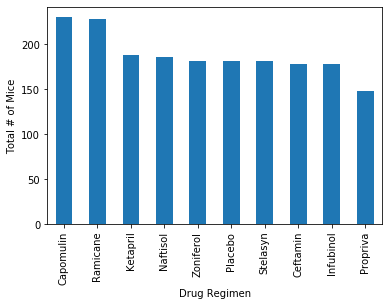

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = pd.DataFrame(clean_df.groupby('Drug Regimen').size())

drug_total = drug_regimen.sort_values(0, ascending=False)

bargraph = drug_total.plot(kind="bar",legend=False) 

bargraph.set_ylabel("Total # of Mice")

plt.show()

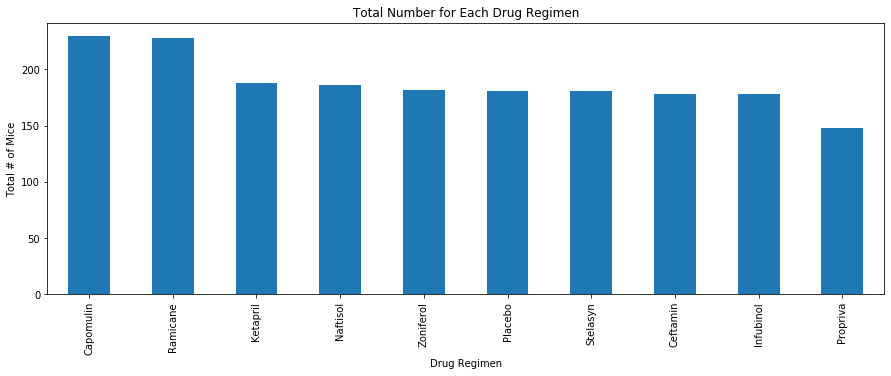

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_total = clean_df['Drug Regimen'].value_counts()

drug_total.plot(kind='bar', figsize=(15,5))

plt.xlabel("Drug Regimen")

plt.ylabel("Total # of Mice")

plt.title("Total Number for Each Drug Regimen")

plt.show()

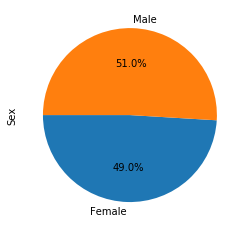

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = clean_df.groupby('Sex').size()

plot = gender_df.plot.pie(y='Sex',autopct='%1.1f%%',startangle=180, label='Sex')

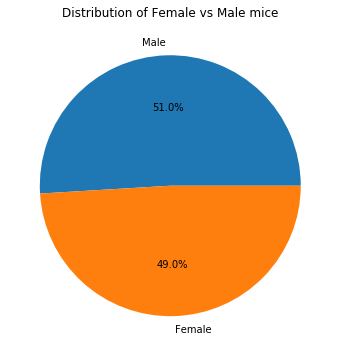

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df = clean_df['Sex'].value_counts()

plt_labels = 'Male', 'Female'

plt.figure(figsize=(6,6))

plt.pie(gender_df,labels=plt_labels, autopct='%1.1f%%')

plt.title('Distribution of Female vs Male mice');

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = pd.DataFrame(clean_df.groupby("Mouse ID").max()["Timepoint"])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

last_merge = pd.merge(last_timepoint,clean_df, on=("Mouse ID", "Timepoint"))

last_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatment:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume = last_merge.loc[last_merge["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    
    # add subset 

    volume_list.append(final_volume)
    
    quartiles = final_volume.quantile([.25,.5,.75])
    
    lower = quartiles[0.25]
    
    upper = quartiles[0.75]
    
    iqr = upper-lower
    
    lower_bound = lower - (1.5*iqr)
    
    upper_bound = upper + (1.5*iqr)     
    
    # Determine outliers using upper and lower bounds
    
    outliers = final_volume[(final_volume < lower_bound) | (final_volume > upper_bound)]
    
    print(f"{drug}'s potential outliers are: {outliers}")

Capomulin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [28]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

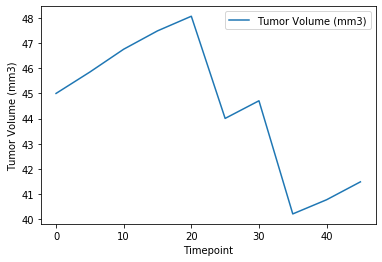

In [30]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_df[clean_df['Mouse ID'] == 'l509']

capomulin_df.plot.line(y="Tumor Volume (mm3)", x="Timepoint")

plt.ylabel("Tumor Volume (mm3)")

plt.show()

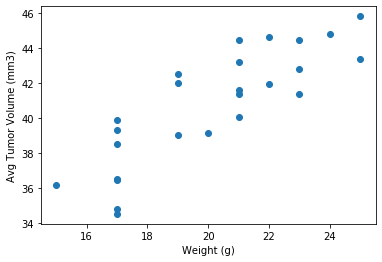

In [32]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

capomulin_avg = capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])

plt.xlabel('Weight (g)')

plt.ylabel('Avg Tumor Volume (mm3)')

plt.savefig('scatterplot')

plt.show()

## Correlation and Regression

Correlation between mouse weight and average tumor volume is 0.84
r-squared is: 0.5874984592659988


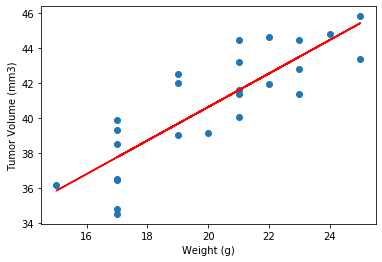

In [39]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = round(st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2)

print(f"Correlation between mouse weight and average tumor volume is {correlation}")

x_val = combined_df['Weight (g)']
y_val = combined_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)

regress_val = x_val * slope + intercept

regression = st.linregress(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)']) 

y_line = capomulin_avg['Weight (g)'] * regression[0] + regression[1]

plt.xlabel('Weight (g)')

plt.ylabel('Tumor Volume (mm3)')



print(f"r-squared is: {rvalue}")

plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)']) 

plt.plot(capomulin_avg["Weight (g)"], y_line, color="red");